In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
cnn = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cnn.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['самолет', 'машина', 'птичка', 'кошечка', 'оленб', 'пьес', 'ляшуха', 'лошадь', 'кораблик', 'камазик']

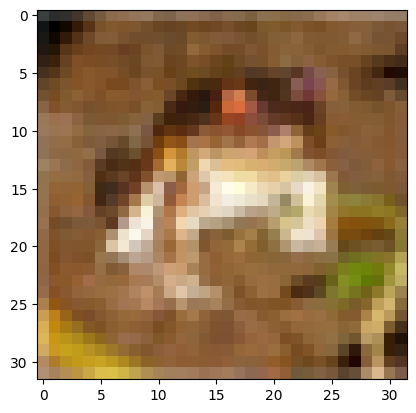

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

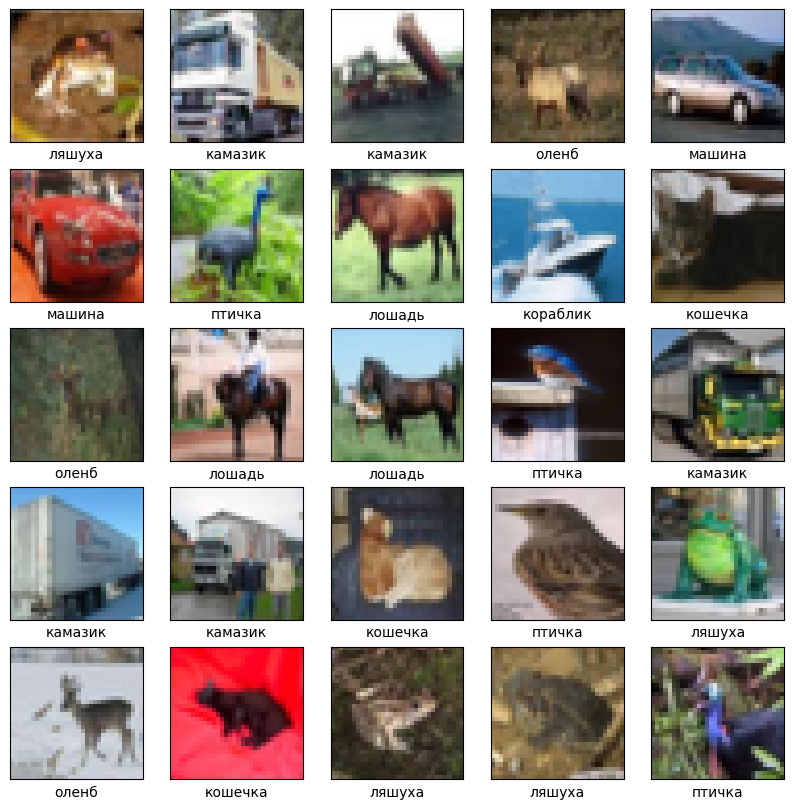

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[int(train_labels[i])])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5034 - accuracy: 0.4519 - val_loss: 1.2329 - val_accuracy: 0.5559
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1415 - accuracy: 0.5954 - val_loss: 1.0742 - val_accuracy: 0.6163
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0066 - accuracy: 0.6455 - val_loss: 1.0535 - val_accuracy: 0.6282
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9136 - accuracy: 0.6787 - val_loss: 0.9551 - val_accuracy: 0.6660
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8415 - accuracy: 0.7051 - val_loss: 0.9351 - val_accuracy: 0.6778
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7850 - accuracy: 0.7259 - val_loss: 0.8582 - val_accuracy: 0.7025
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7387 - accuracy: 0.7417 - val_loss: 0.8737 -

313/313 - 5s - loss: 0.8745 - accuracy: 0.7099 - 5s/epoch - 15ms/step


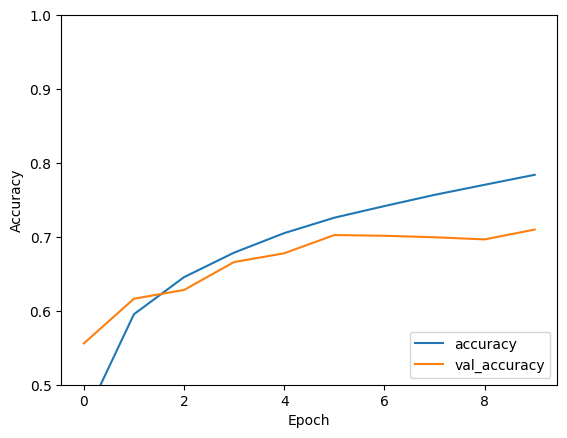

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)